In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


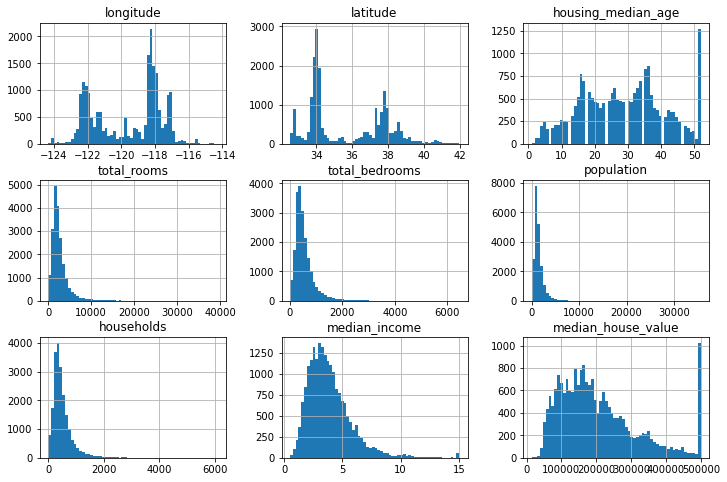

In [27]:
df.hist(bins=60,figsize=(12,8))
plt.show()

In [28]:
df["median_house_value"].value_counts().head()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
Name: median_house_value, dtype: int64

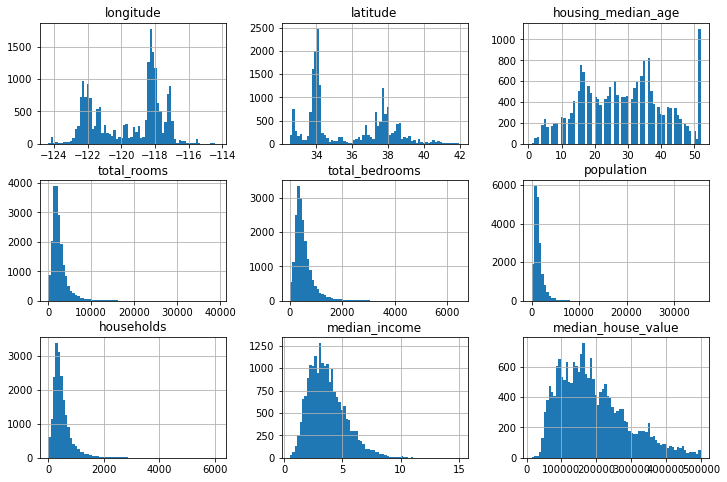

In [120]:
df =df[df["median_house_value"] != 500001.0]
df.hist(bins=70,figsize=(12,8))
plt.show()

In [23]:
df["housing_median_age"].value_counts().head()

52.0    1103
36.0     822
35.0     789
16.0     756
17.0     684
Name: housing_median_age, dtype: int64

In [45]:
df[df["housing_median_age"]==52].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Room_density
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.957661
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.283154
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.879646
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,2.225182
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,2.317185


In [49]:
df["population"].max()

35682.0

In [39]:
df.iloc[:,2:9].corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.372009,-0.327308,-0.295124,-0.309438,-0.194784,0.067948
total_rooms,-0.372009,1.000000,0.934147,0.859590,0.921102,0.224207,0.143139
total_bedrooms,-0.327308,0.934147,1.000000,0.879176,0.979144,0.021903,0.074672
population,-0.295124,0.859590,0.879176,1.000000,0.908997,0.042360,0.011964
households,-0.309438,0.921102,0.979144,0.908997,1.000000,0.046068,0.094894
median_income,-0.194784,0.224207,0.021903,0.042360,0.046068,1.000000,0.642611
median_house_value,0.067948,0.143139,0.074672,0.011964,0.094894,0.642611,1.000000


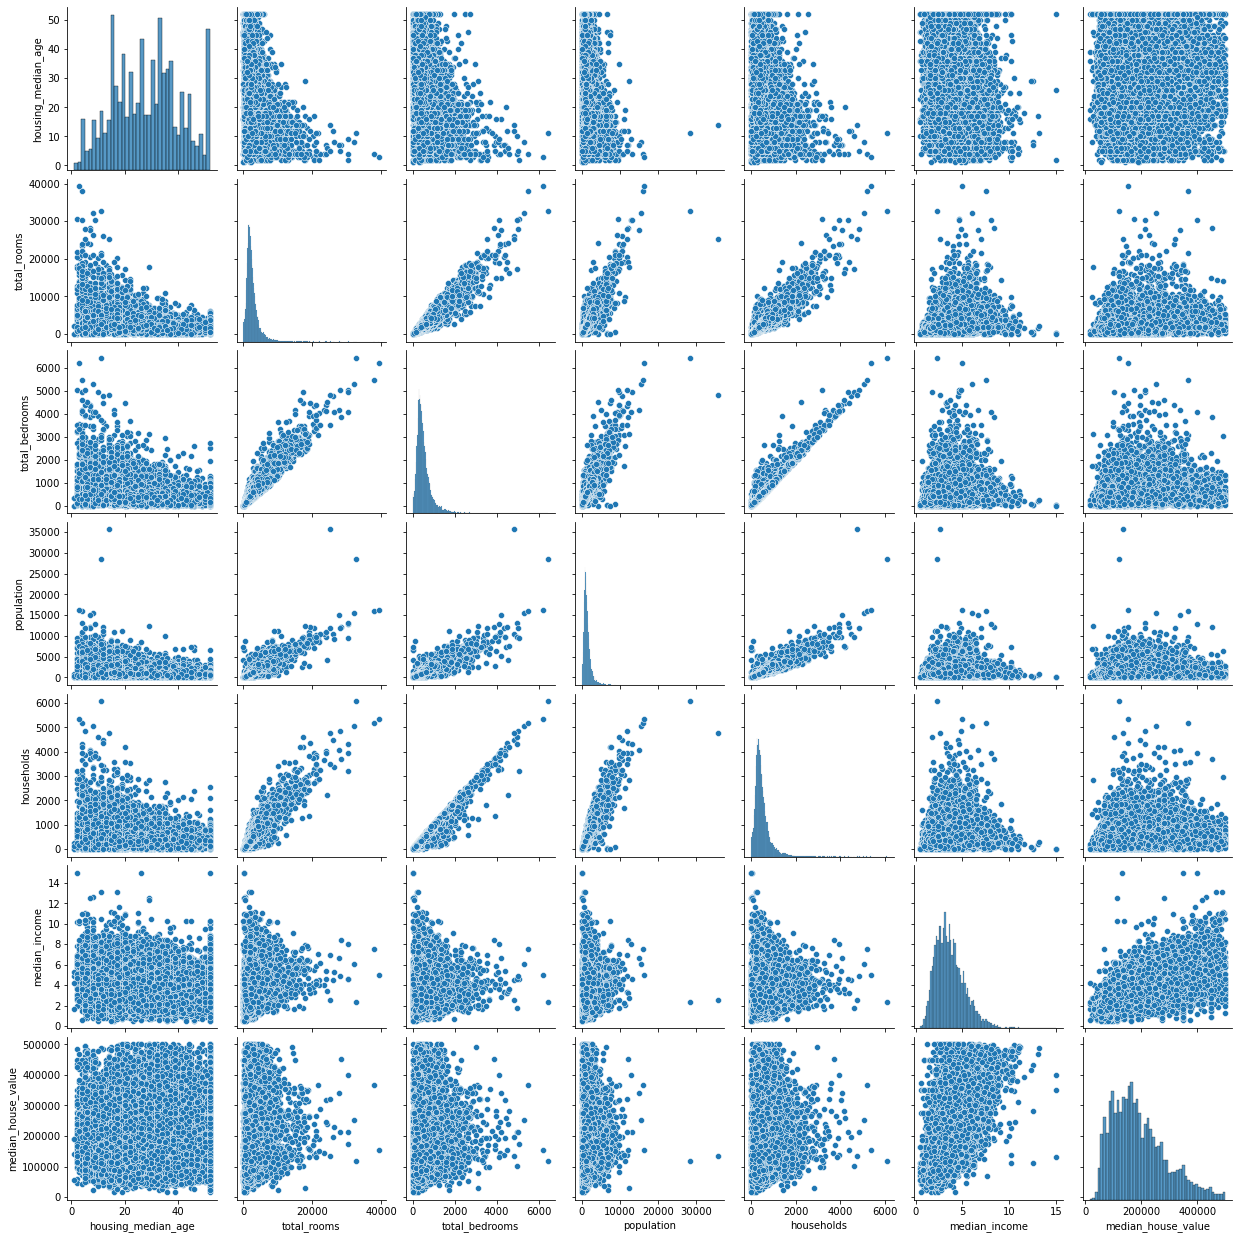

In [40]:
import seaborn as sns
sns.pairplot(df.iloc[:,2:9])

In [42]:
df["Room_density"]=df["total_rooms"]/df["population"]

In [60]:
df[df["population"]<25000].iloc[:,2:9]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


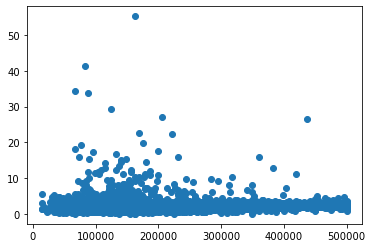

In [54]:
plt.scatter(df[df["population"]<25000]["median_house_value"],df[df["population"]<25000]["Room_density"])

In [61]:
df[df["population"]<25000].iloc[:,2:9].corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.373281,-0.328263,-0.303182,-0.310447,-0.194909,0.067867
total_rooms,-0.373281,1.000000,0.933131,0.866329,0.919849,0.226904,0.145076
total_bedrooms,-0.328263,0.933131,1.000000,0.886978,0.978834,0.023073,0.076109
population,-0.303182,0.866329,0.886978,1.000000,0.916707,0.046229,0.014320
households,-0.310447,0.919849,0.978834,0.916707,1.000000,0.047520,0.096620
median_income,-0.194909,0.226904,0.023073,0.046229,0.047520,1.000000,0.642592
median_house_value,0.067867,0.145076,0.076109,0.014320,0.096620,0.642592,1.000000


In [62]:
df=df[]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Room_density
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.732919
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.956685
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.957661
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.283154
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.879646
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.970414
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1.957865
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.238332
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.510121


<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

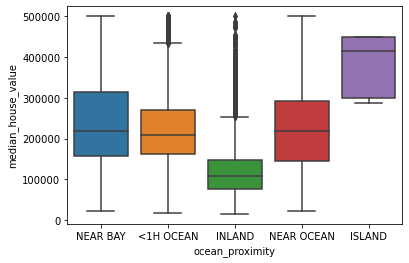

In [68]:
sns.boxplot(y=df["median_house_value"],x=df["ocean_proximity"])

In [121]:
df = df[["longitude","latitude","population","median_income","median_house_value","ocean_proximity"]]

In [122]:
df.head().isna().any()

longitude             False
latitude              False
population            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [117]:
df.head()

,longitude,latitude,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,2401.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,496.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,558.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,565.0,3.8462,342200.0,NEAR BAY


-122.2 37.8   -118.2 34

In [123]:
R_L1 = np.sqrt((df["longitude"]-(-122.2))**2 + (df["latitude"]-(37.8))**2)
R_L2 = np.sqrt((df["longitude"]-(-118.1))**2 + (df["latitude"]-(34))**2)
df.loc[:,"R_L1"] = R_L1
df.loc[:,"R_L2"] = R_L2
df

,longitude,latitude,population,median_income,median_house_value,ocean_proximity,R_L1,R_L2
0,-122.23,37.88,322.0,8.3252,452600.0,NEAR BAY,0.085440,5.666683
1,-122.22,37.86,2401.0,8.3014,358500.0,NEAR BAY,0.063246,5.645706
2,-122.24,37.85,496.0,7.2574,352100.0,NEAR BAY,0.064031,5.653503
3,-122.25,37.85,558.0,5.6431,341300.0,NEAR BAY,0.070711,5.660830
4,-122.25,37.85,565.0,3.8462,342200.0,NEAR BAY,0.070711,5.660830
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,845.0,1.5603,78100.0,INLAND,2.013579,6.242636
20636,-121.21,39.49,356.0,2.5568,77100.0,INLAND,1.958622,6.309691
20637,-121.22,39.43,1007.0,1.7000,92300.0,INLAND,1.901920,6.262531
20638,-121.32,39.43,741.0,1.8672,84700.0,INLAND,1.852377,6.312947


In [197]:
df["Distance"] = None
filt = df["R_L1"]<df["R_L2"]
filt2 = df["R_L1"]>=df["R_L2"]
df.loc[filt,"Distance"]=df["R_L1"]
df.loc[filt2,"Distance"]=df["R_L2"]
df["Distance"] = df["Distance"].astype(float)

In [198]:
df.dtypes

longitude             float64
latitude              float64
population            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
R_L1                  float64
R_L2                  float64
Distance              float64
dtype: object

In [199]:
df.corr()

,longitude,latitude,population,median_income,median_house_value,R_L1,R_L2,Distance
longitude,1.000000,-0.924139,0.101061,-0.009067,-0.046658,0.956955,-0.907959,-0.069825
latitude,-0.924139,1.000000,-0.113378,-0.078026,-0.148289,-0.897032,0.942679,0.269362
population,0.101061,-0.113378,1.000000,0.042360,0.011964,0.090007,-0.113509,-0.075496
median_income,-0.009067,-0.078026,0.042360,1.000000,0.642611,-0.023947,-0.052482,-0.227946
median_house_value,-0.046658,-0.148289,0.011964,0.642611,1.000000,-0.034449,-0.110443,-0.424535
R_L1,0.956955,-0.897032,0.090007,-0.023947,-0.034449,1.000000,-0.864073,-0.006066
R_L2,-0.907959,0.942679,-0.113509,-0.052482,-0.110443,-0.864073,1.000000,0.331425
Distance,-0.069825,0.269362,-0.075496,-0.227946,-0.424535,-0.006066,0.331425,1.000000


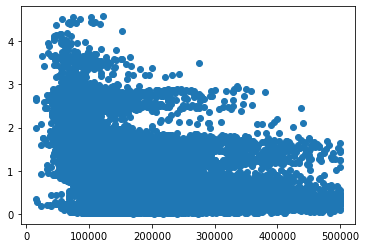

In [200]:
plt.scatter(df["median_house_value"],df["Distance"])

In [216]:
df = df[["population","median_income","ocean_proximity","Distance","median_house_value"]]
df

,population,median_income,ocean_proximity,Distance,median_house_value
0,322.0,8.3252,NEAR BAY,0.085440,452600.0
1,2401.0,8.3014,NEAR BAY,0.063246,358500.0
2,496.0,7.2574,NEAR BAY,0.064031,352100.0
3,558.0,5.6431,NEAR BAY,0.070711,341300.0
4,565.0,3.8462,NEAR BAY,0.070711,342200.0
...,...,...,...,...,...
20635,845.0,1.5603,INLAND,2.013579,78100.0
20636,356.0,2.5568,INLAND,1.958622,77100.0
20637,1007.0,1.7000,INLAND,1.901920,92300.0
20638,741.0,1.8672,INLAND,1.852377,84700.0


In [217]:
Train = pd.get_dummies(df)

In [218]:
Train.head()

,population,median_income,Distance,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,322.0,8.3252,0.085440,452600.0,0,0,0,1,0
1,2401.0,8.3014,0.063246,358500.0,0,0,0,1,0
2,496.0,7.2574,0.064031,352100.0,0,0,0,1,0
3,558.0,5.6431,0.070711,341300.0,0,0,0,1,0
4,565.0,3.8462,0.070711,342200.0,0,0,0,1,0


In [219]:
y = Train.pop("median_house_value")
y = y.values

In [220]:
X= Train.values

In [221]:
X

array([[3.22000000e+02, 8.32520000e+00, 8.54400375e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.40100000e+03, 8.30140000e+00, 6.32455532e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.96000000e+02, 7.25740000e+00, 6.40312424e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.00700000e+03, 1.70000000e+00, 1.90192008e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.41000000e+02, 1.86720000e+00, 1.85237685e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38700000e+03, 2.38860000e+00, 1.84024455e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [222]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X = Scaler.fit_transform(X)
X

array([[-0.97830794,  2.96038034, -0.96076774, ..., -0.01594347,
         2.89601925, -0.37678898],
       [ 0.83960414,  2.94522334, -0.98768515, ..., -0.01594347,
         2.89601925, -0.37678898],
       [-0.82615946,  2.28035331, -0.98673227, ..., -0.01594347,
         2.89601925, -0.37678898],
       ...,
       [-0.37933258, -1.25886958,  1.24225429, ..., -0.01594347,
        -0.34530157, -0.37678898],
       [-0.61192739, -1.15238848,  1.18216839, ..., -0.01594347,
        -0.34530157, -0.37678898],
       [-0.04705428, -0.82033558,  1.16745437, ..., -0.01594347,
        -0.34530157, -0.37678898]])

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Simple Linear Regression

In [244]:

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [245]:
linear_reg.score(X_test, y_test)

0.570964607590868

In [246]:
lr_pred = linear_reg.predict(X_test)

In [247]:
from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_test,lr_pred)))
print((r2_score(y_test,lr_pred)))

64709.259729598576
0.570964607590868


## Ridge

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge_reg = Ridge(alpha=0.3)
#linear_reg = LinearRegression()

ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.3)

In [262]:
ridge_reg.score(X_test, y_test)
l2_pred = ridge_reg.predict(X_test)

In [263]:
from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_test,l2_pred)))
print((r2_score(y_test,l2_pred)))

64709.94545999784
0.5709555144820606


## Poly Basis + Ridge

In [281]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(2, include_bias=False)
ridge_reg = Ridge(alpha=0.1)
pipe=Pipeline([("poly",poly),("Rideg",ridge_reg)])

pipe.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('Rideg', Ridge(alpha=0.1))])

In [282]:
pipe.score(X_test, y_test)
poly_pred = pipe.predict(X_test)

In [283]:
from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_test,poly_pred)))
print((r2_score(y_test,poly_pred)))

63930.054047812104
0.5812349774110777


## Poly + Lasso

In [298]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(1, include_bias=False)
lasso_reg = Lasso(alpha=0.00000001)
pipe=Pipeline([("poly",poly),("Lasso",lasso_reg)])

pipe.fit(X_train,y_train)

pipe.score(X_test, y_test)
poly_pred = pipe.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_test,poly_pred)))
print((r2_score(y_test,poly_pred)))

64709.945380206635
0.5709555155401353


C:\Users\c_shw\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1637659983848.7188, tolerance: 12445867668.367878
  model = cd_fast.enet_coordinate_descent(


## Xgb

In [225]:
import xgboost as xgb


In [226]:
dtrain = xgb.DMatrix(X_train, y_train)

In [227]:
dtest = xgb.DMatrix(X_test)

In [228]:
y_mean = np.mean(y_train)

In [229]:
import multiprocessing
n_cpus_avaliable = multiprocessing.cpu_count()
print(f'we\'ve got {n_cpus_avaliable} cpus to work with.')

we've got 4 cpus to work with.


In [230]:
xgb_params = {'eta' :  0.05,
                'max_depth' :  8,
                'subsample' : 0.80, 
                'objective' :  'reg:linear',
                'eval_metric' : 'rmse',
                'base_score' :  y_mean,
                'nthread' : n_cpus_avaliable}

In [231]:
model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=1648)

[12:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [232]:
xgb_pred = model.predict(dtest)

In [233]:
test_mse = np.mean(((xgb_pred - y_test)**2))
test_rmse = np.sqrt(test_mse)
print(f'final test rmse: {test_rmse} with 1648 prediction rounds used')

final test rmse: 59191.05005511249 with 1648 prediction rounds used


In [237]:
from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_test,xgb_pred)))
print((r2_score(y_test,xgb_pred)))

59191.05005511249
0.6410182703498604


In [238]:
xgb_pred

array([141794.83, 210209.78, 127004.75, ..., 188039.88, 296003.  ,
       302936.03], dtype=float32)

In [239]:
y_test

array([104200., 171200.,  97300., ..., 147300., 227700., 377200.])